<a href="https://colab.research.google.com/github/slowvak/AI-Deep-Learning-Lab/blob/master/ImageProcessingAndDICOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Tutorial on Image Processing in Python
(C) Copyright Bradley Erickson 2023


Image processing is a very large topic and we clearly cannot cover everything, but this does show some of hte common function required in medical image processing.


In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

--2023-01-10 22:14:16--  https://www.dropbox.com/s/56c8b451n3lcdun/T2_Ax_Brain.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/56c8b451n3lcdun/T2_Ax_Brain.jpg [following]
--2023-01-10 22:14:16--  https://www.dropbox.com/s/raw/56c8b451n3lcdun/T2_Ax_Brain.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc89232dfb3711d53e45ed42d6a5.dl.dropboxusercontent.com/cd/0/inline/B0WfhTF-X5QxIbKrVDGAY6elQdyoGHgk1N0fEsAIyrF9at65H_4tybYxdeyaPuS0Ak92tErTFXaeeu1mejj2SBa7umLJDCTvAkVazewz-r-p2XJ6O-9fwgZipmXH4bldsVOv0UCpEtB8N5vF3K2u69t8jNlkVY12sGZ2-hFBcSLagg/file# [following]
--2023-01-10 22:14:16--  https://uc89232dfb3711d53e45ed42d6a5.dl.dropboxusercontent.com/cd/0/inline/B0WfhTF-X5QxIbKrVDGAY6elQdyoGHgk1N0fEsAIyrF9at65H_4tybYxdeyaPuS0Ak92

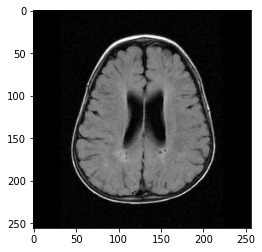

In [8]:
import gdown
from PIL import Image

#!gdown https://drive.google.com/file/d/14C2DCQvw2gmw86S6hquvJKelGv55aLGG -O ./T2_Ax_Brain.jpg

!wget --no-check-cert https://www.dropbox.com/s/56c8b451n3lcdun/T2_Ax_Brain.jpg
#gdown.download(
#    "https://www.dropbox.com/s/56c8b451n3lcdun/T2_Ax_Brain.jpg?dl=0",
#    "T2_Ax_Brain.jpg",
#    quiet=False)

# We will use both the Pillow library and the imread function in matplotlib
brain_gray = Image.open("./T2_Ax_Brain.jpg").convert('L')
image = plt.imread("./T2_Ax_Brain.jpg")
imgplot = plt.imshow(image)


In [3]:
#Let's do some basics like rotating, flipping, changing grayscale, cropping and resizing

In [4]:
# rotate


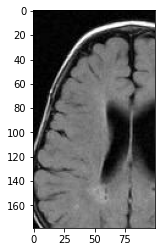

In [9]:
# crop
crop_img = image[20:199,50:150,:]    # we have a 2D image. Why is this a 3D array?
imgplot = plt.imshow(crop_img)

* Image Processing in Numpy
Numpy is a very powerful library for processing arrays, and since images are arrays, these can work together very well. THe main limit is that not all functions are sensible for images, and numpy doesn't always make it easy to show the arrays it produces as images.

In [11]:
# confirm the shape

print(f'Image shape: {image.shape}')
print(f'Grayscale Image shape: {brain_gray.size}')

Image shape: (256, 256, 3)
Grayscale Image shape: (256, 256)


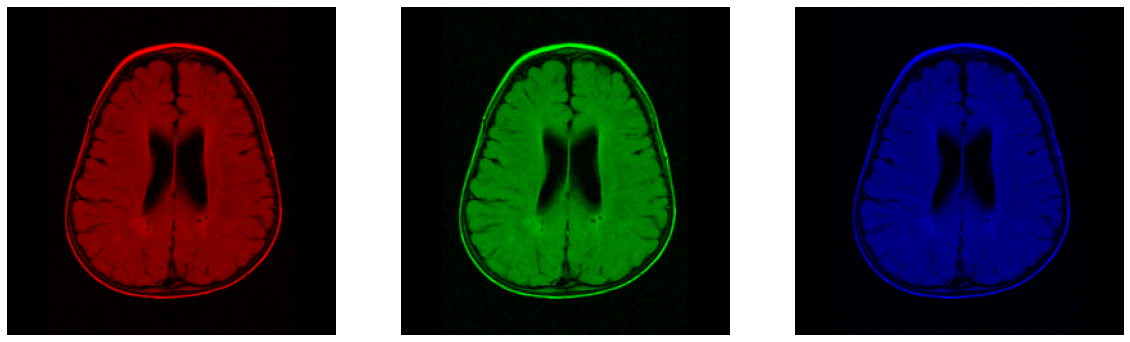

In [12]:
# Although our image is grayscale, if you look back at cell 3, which printed out the info about the image, it is RGB
# so lets split it into the 3 channels and confirm

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
 
for c, ax in zip(range(3), axs):
    rgb_img = np.zeros(image.shape, dtype="uint8")
    rgb_img[:,:,c] = image[:,:,c]
    ax.imshow(rgb_img)
    ax.set_axis_off()


In [15]:
# first we will convert image to numpy array
brain_np = np.asarray(brain_gray)
brain_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

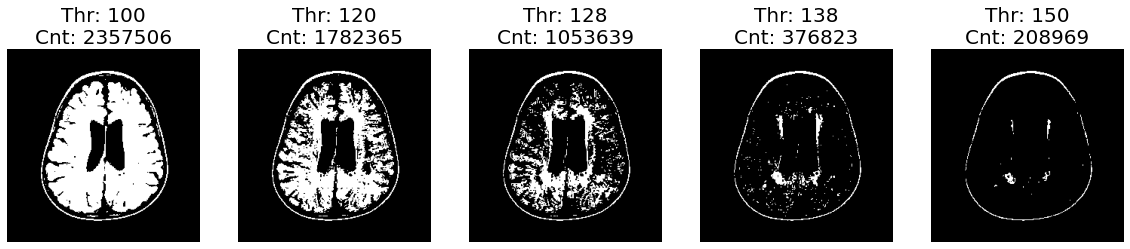

In [22]:
# now apply some thresholds

def simple_threshold(image, threshold=128):
    return ((image > threshold) * 255).astype("uint8")
 
thresholds = [50,120,128,138,150]
 
fig, axs = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5));
                        
for t, ax in zip(thresholds, axs):
    ax.imshow(simple_threshold(brain_np, t), cmap='gray');
    c = np.sum(brain_np[brain_np > t])
    ax.set_title(f"Thr: {t}\nCnt: {c}", fontsize=20);
    ax.set_axis_off();

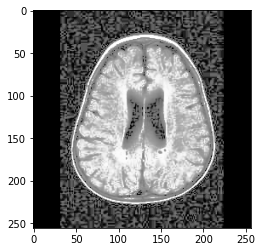

In [20]:
# histogram equalization

from skimage import exposure
import numpy as np


def histogram_equalize(img):
    img_cdf, bin_centers = exposure.cumulative_distribution(img)
    return np.interp(img, bin_centers, img_cdf)

heq = histogram_equalize(brain_np)

plt.imshow(heq, cmap='gray')

In [19]:
heq

array([[0.26554871, 0.26554871, 0.26554871, ..., 0.26554871, 0.26554871,
        0.26554871],
       [0.26554871, 0.26554871, 0.26554871, ..., 0.26554871, 0.26554871,
        0.26554871],
       [0.26554871, 0.26554871, 0.26554871, ..., 0.26554871, 0.26554871,
        0.26554871],
       ...,
       [0.26554871, 0.26554871, 0.26554871, ..., 0.26554871, 0.26554871,
        0.26554871],
       [0.26554871, 0.26554871, 0.26554871, ..., 0.26554871, 0.26554871,
        0.26554871],
       [0.26554871, 0.26554871, 0.26554871, ..., 0.26554871, 0.26554871,
        0.26554871]])